In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaModel
import pandas as pd
import ecopy as ep
import seaborn as sns
import json
from scipy import stats
from scipy.stats import t
import pingouin as pg

C:\Users\minha\Anaconda3\envs\old_network\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
nTopics = 11

In [3]:
# Load model

lda_model = LdaModel.load(f'pickled_1907/trained_models/trained_lda_model_{nTopics}.model')



# Load topic distributions

distribution_file_name = f'pickled_1907/topic_distribution//topic_distributions_{nTopics}.npy'
topic_distributions = np.load(distribution_file_name)


# Pull topics

# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)



# load raw corpus dataframe

with open('pickled_1907/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

In [6]:
years = np.unique(corpus_df['Year'])

In [4]:
#count number of zero elements in topic_distributions

df_zero = pd.DataFrame(topic_distributions)


print('Non-Zero Elements:',np.count_nonzero(df_zero))
print('Zero Elements:',((74479 * 45) - np.count_nonzero(df_zero)))
print('Percentage of Zero Elements:',(((74479 * 45) - np.count_nonzero(df_zero))/(74479 * 45))*100,'%')

Non-Zero Elements: 55702
Zero Elements: 3295853
Percentage of Zero Elements: 98.33802518532443 %


In [7]:
# Create a dictionary of topic distributions by year
#topic_distributions_year['Year'][paper][topic_weights]

topic_distributions_year = {}

for y, year in enumerate(years):
    
    topic_distributions_year[year] = topic_distributions[corpus_df['Year'] == year]


In [24]:
topic_distributions_year[2021]

array([[0.        , 0.15136166, 0.02412153, ..., 0.        , 0.        ,
        0.04322053],
       [0.        , 0.03860164, 0.26238394, ..., 0.        , 0.06998127,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27667934,
        0.        ],
       ...,
       [0.        , 0.30607799, 0.03214031, ..., 0.        , 0.        ,
        0.        ],
       [0.0248314 , 0.27803046, 0.62694085, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05369468, 0.        , ..., 0.05539431, 0.        ,
        0.        ]])

In [8]:
# Define a list of diversity metrics for ecopy

diversity_metrics = ['shannon', 'spRich', 'gini-simpson', 'dominance']
diversity_metrics_3 = ['shannon', 'spRich', 'dominance']

In [9]:
# Global diversity metrics
#global_diversity['metric'][paper_diversities]


global_diversity = {}

for metric in diversity_metrics:
    
    global_diversity[metric] = ep.diversity(topic_distributions, method = metric, breakNA=False, num_equiv=False)

In [10]:
global_diversity["shannon"]

array([1.2039045 , 1.05935269, 0.61577304, ..., 1.49802283, 0.91583152,
       0.63328878])

In [11]:
# Yearwise diversity metric
# year_diversity['metric']['year'][paper_diversities]

year_diversity = {}


for metric in diversity_metrics:
    
    year_diversity[metric] = {}
    
    for y, year in enumerate(years):
        
        year_diversity[metric][year] = ep.diversity(topic_distributions_year[year], method = metric, breakNA=False, num_equiv=False)



In [13]:
global_diversity['shannon'].shape

(11187,)

In [32]:
topic_distributions[:,1].shape

(11187,)

In [12]:
import pandas as pd
year_diversity_avg = {}
for y, year in enumerate(year_diversity["shannon"].keys()):
    year_diversity_avg[year] = year_diversity["shannon"][year].mean()
    

In [13]:
year_diversity_mean = pd.DataFrame.from_dict(year_diversity["shannon"],orient="index")

In [14]:
x=year_diversity_mean.T

In [25]:
x

,1939.0,1962.0,1968.0,1970.0,1971.0,1972.0,1974.0,1975.0,1976.0,1977.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,1.203905,1.059353,0.615773,0.893141,1.546512,1.371373,1.418067,0.774451,1.542126,1.182743,...,1.175856,1.654957,0.879468,1.131973,1.538670,1.173180,0.778507,1.585347,1.398016,1.201783
1,NaN,NaN,NaN,1.546574,NaN,NaN,NaN,1.045323,1.507129,0.892870,...,0.883564,1.166771,1.327974,1.270288,1.508562,0.853087,1.577449,1.303938,1.018695,1.852024
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941583,1.225708,NaN,...,1.281322,0.902274,1.311384,1.058685,0.538996,1.777577,1.582649,1.091706,1.129421,1.132679
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.311285,NaN,NaN,...,1.488572,1.325403,1.118437,1.905499,1.395925,0.826150,1.166057,1.092786,0.619474,1.229751
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941504,NaN,NaN,...,0.574672,1.587404,1.235639,1.078418,1.313927,1.023547,1.323416,1.548239,1.629857,1.505642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044655,NaN
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129411,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.933435,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.123708,NaN


In [30]:
diversity_1992to2021=x.loc[:,1992:2021]
diversity_1992to2021.mean().min()

1.0589075582121759

In [34]:
tick=list(diversity_1992to2021.columns.astype(int))
tick

[1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [18]:
import time
saving_path="C:/Users/minha/Desktop/plots_new/updated/"
font = {'family' : "Arial",
         'weight' : 'normal',
         'size'   : 14}
plt.rc('font', **font)

<ipython-input-19-26c87f4309a2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(np.arange(start, end, 0.2),2),alpha=0.6,size=90)


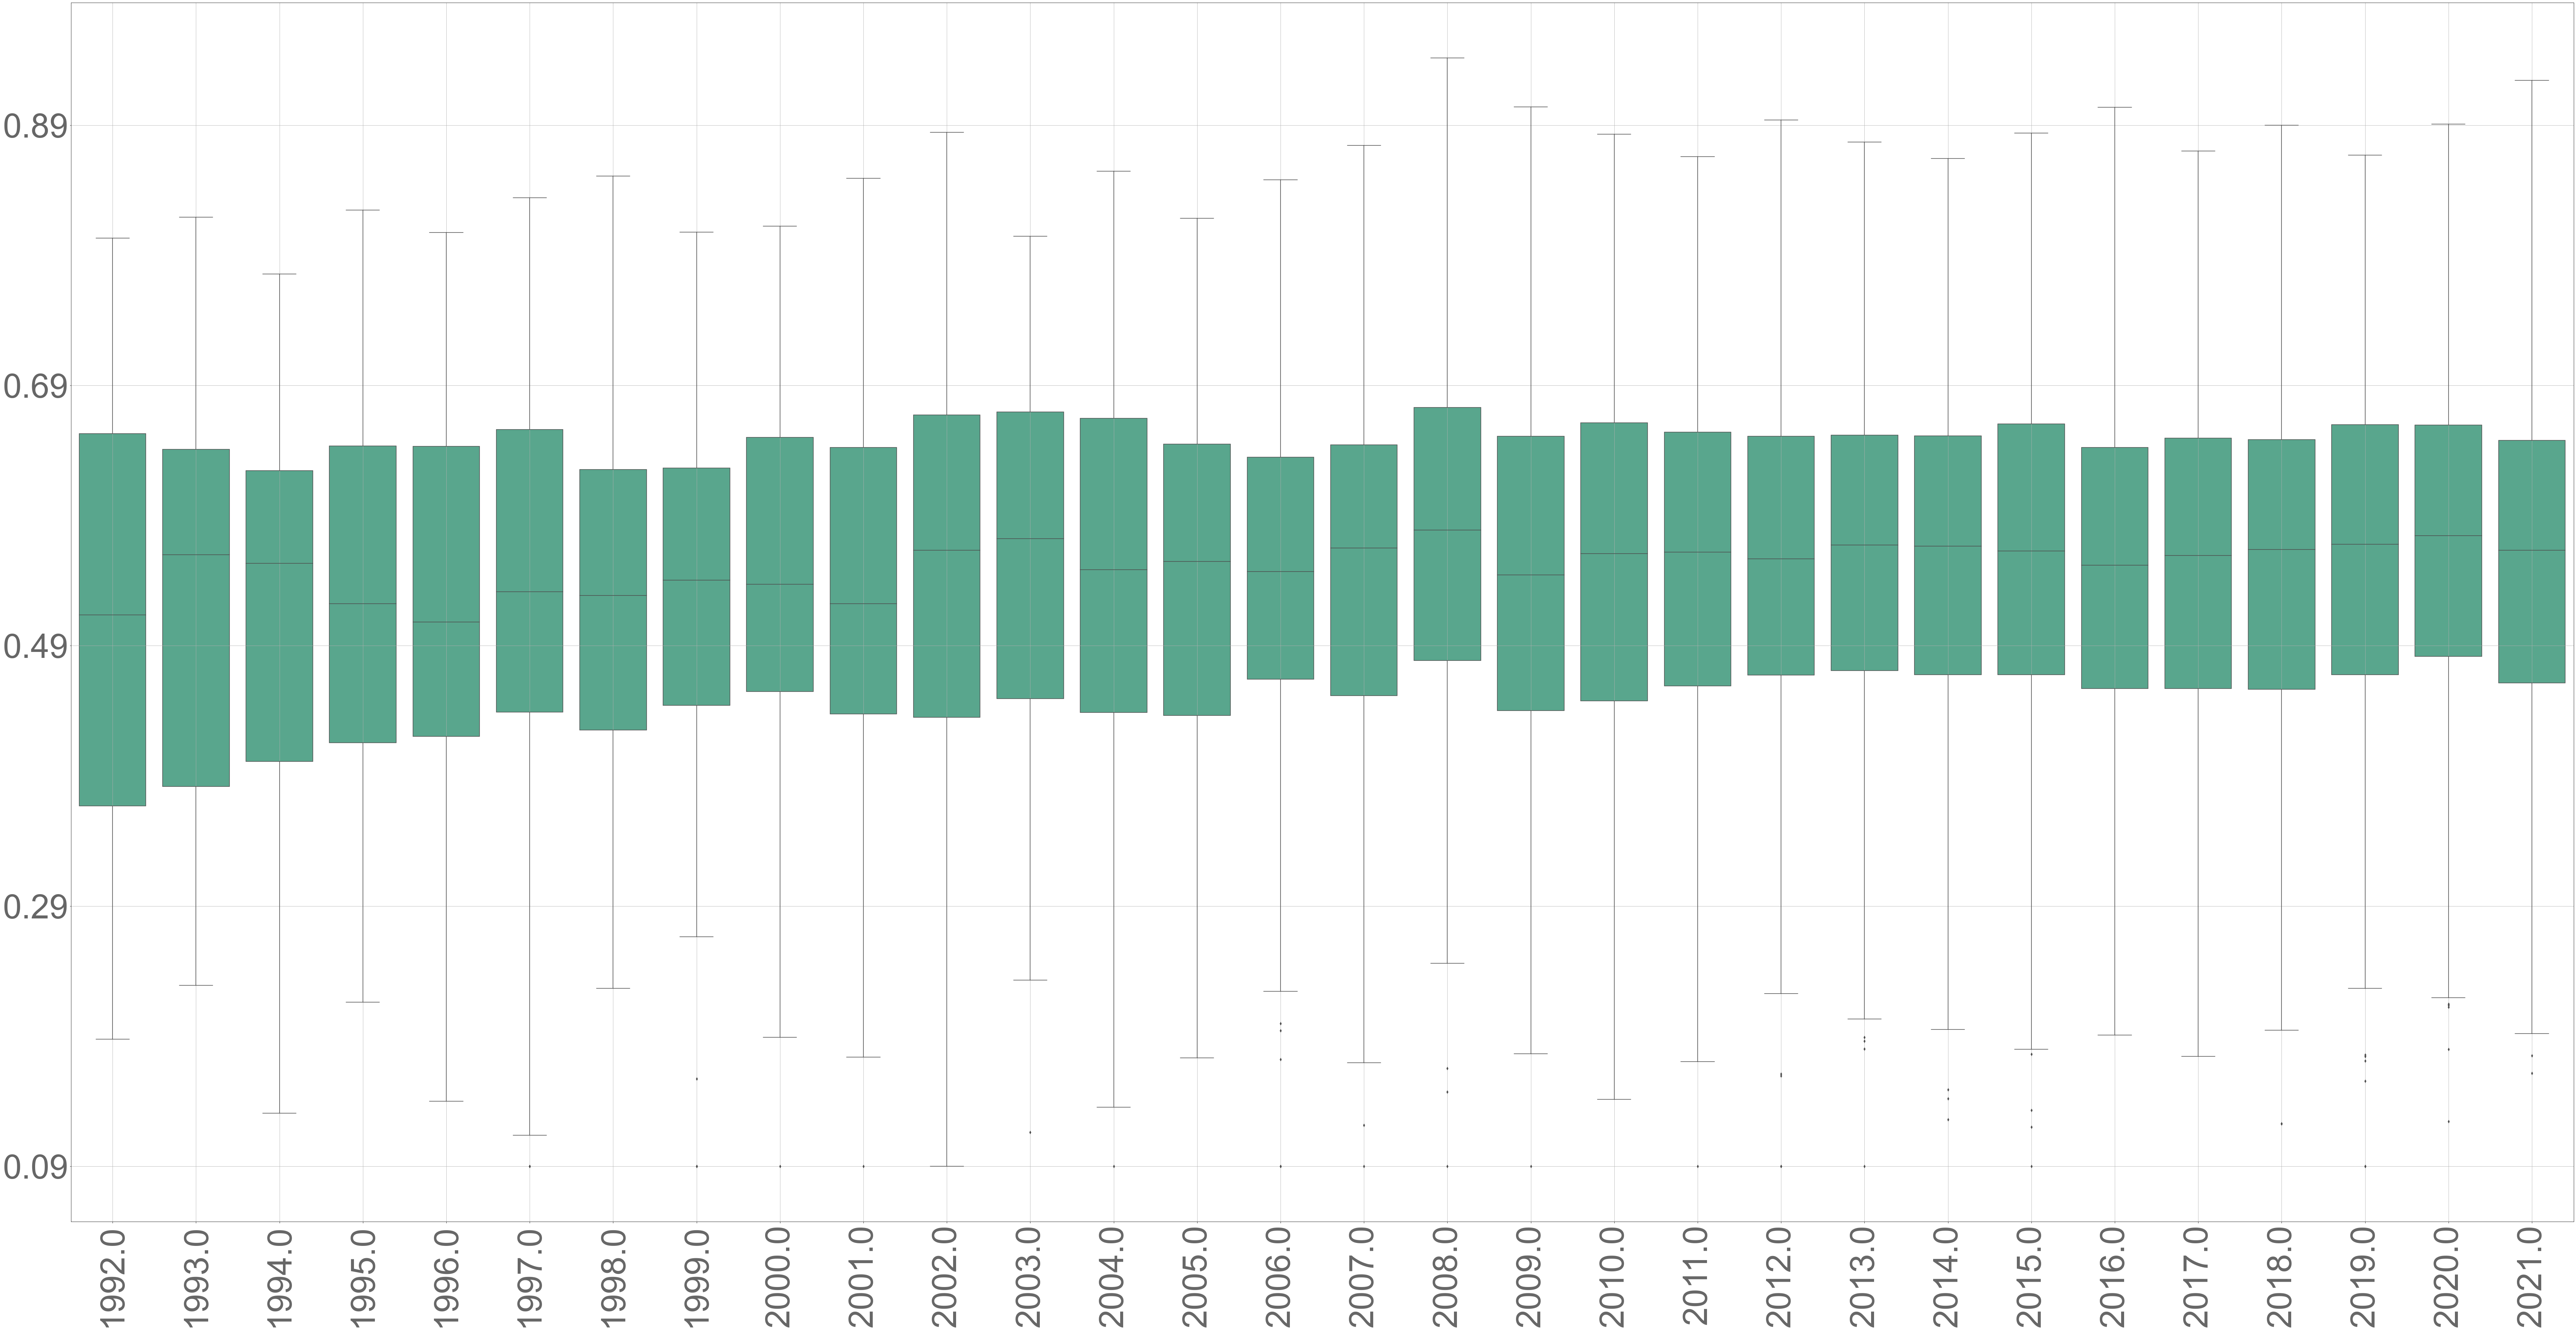

In [19]:
fig,ax = plt.subplots(figsize=(120,60), facecolor='white')
sns.boxplot(data=diversity_1992to2021,color="#4CB391",ax=ax)
start, end = ax.get_ylim()
#ax.xticks(rotation = 90)
xlabels = [label.get_text() for label in ax.get_xticklabels()]
#plt.tick_params(axis="y", labelsize=80)
ax.set_xticklabels(xlabels,alpha=0.6,rotation = 90,size=90)
#ylabels = [ylabel.get_text() for ylabel in ax.get_yticklabels()]
#ax.yaxis.set_ticks(np.arange(start, end, 0.3),labelsize=80)
ax.set_yticklabels(np.around(np.arange(start, end, 0.2),2),alpha=0.6,size=90)
#ax.Yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#plt.tick_params(axis="y", labelsize=80)
#plt.tick_params(axis="x", labelsize=80)

plt.grid()
#plt.savefig(saving_path+"average_shanon_diversity_per_year"+ time.strftime("%Y-%m-%d")+".png",dpi=150)

In [ ]:
yticks=[]

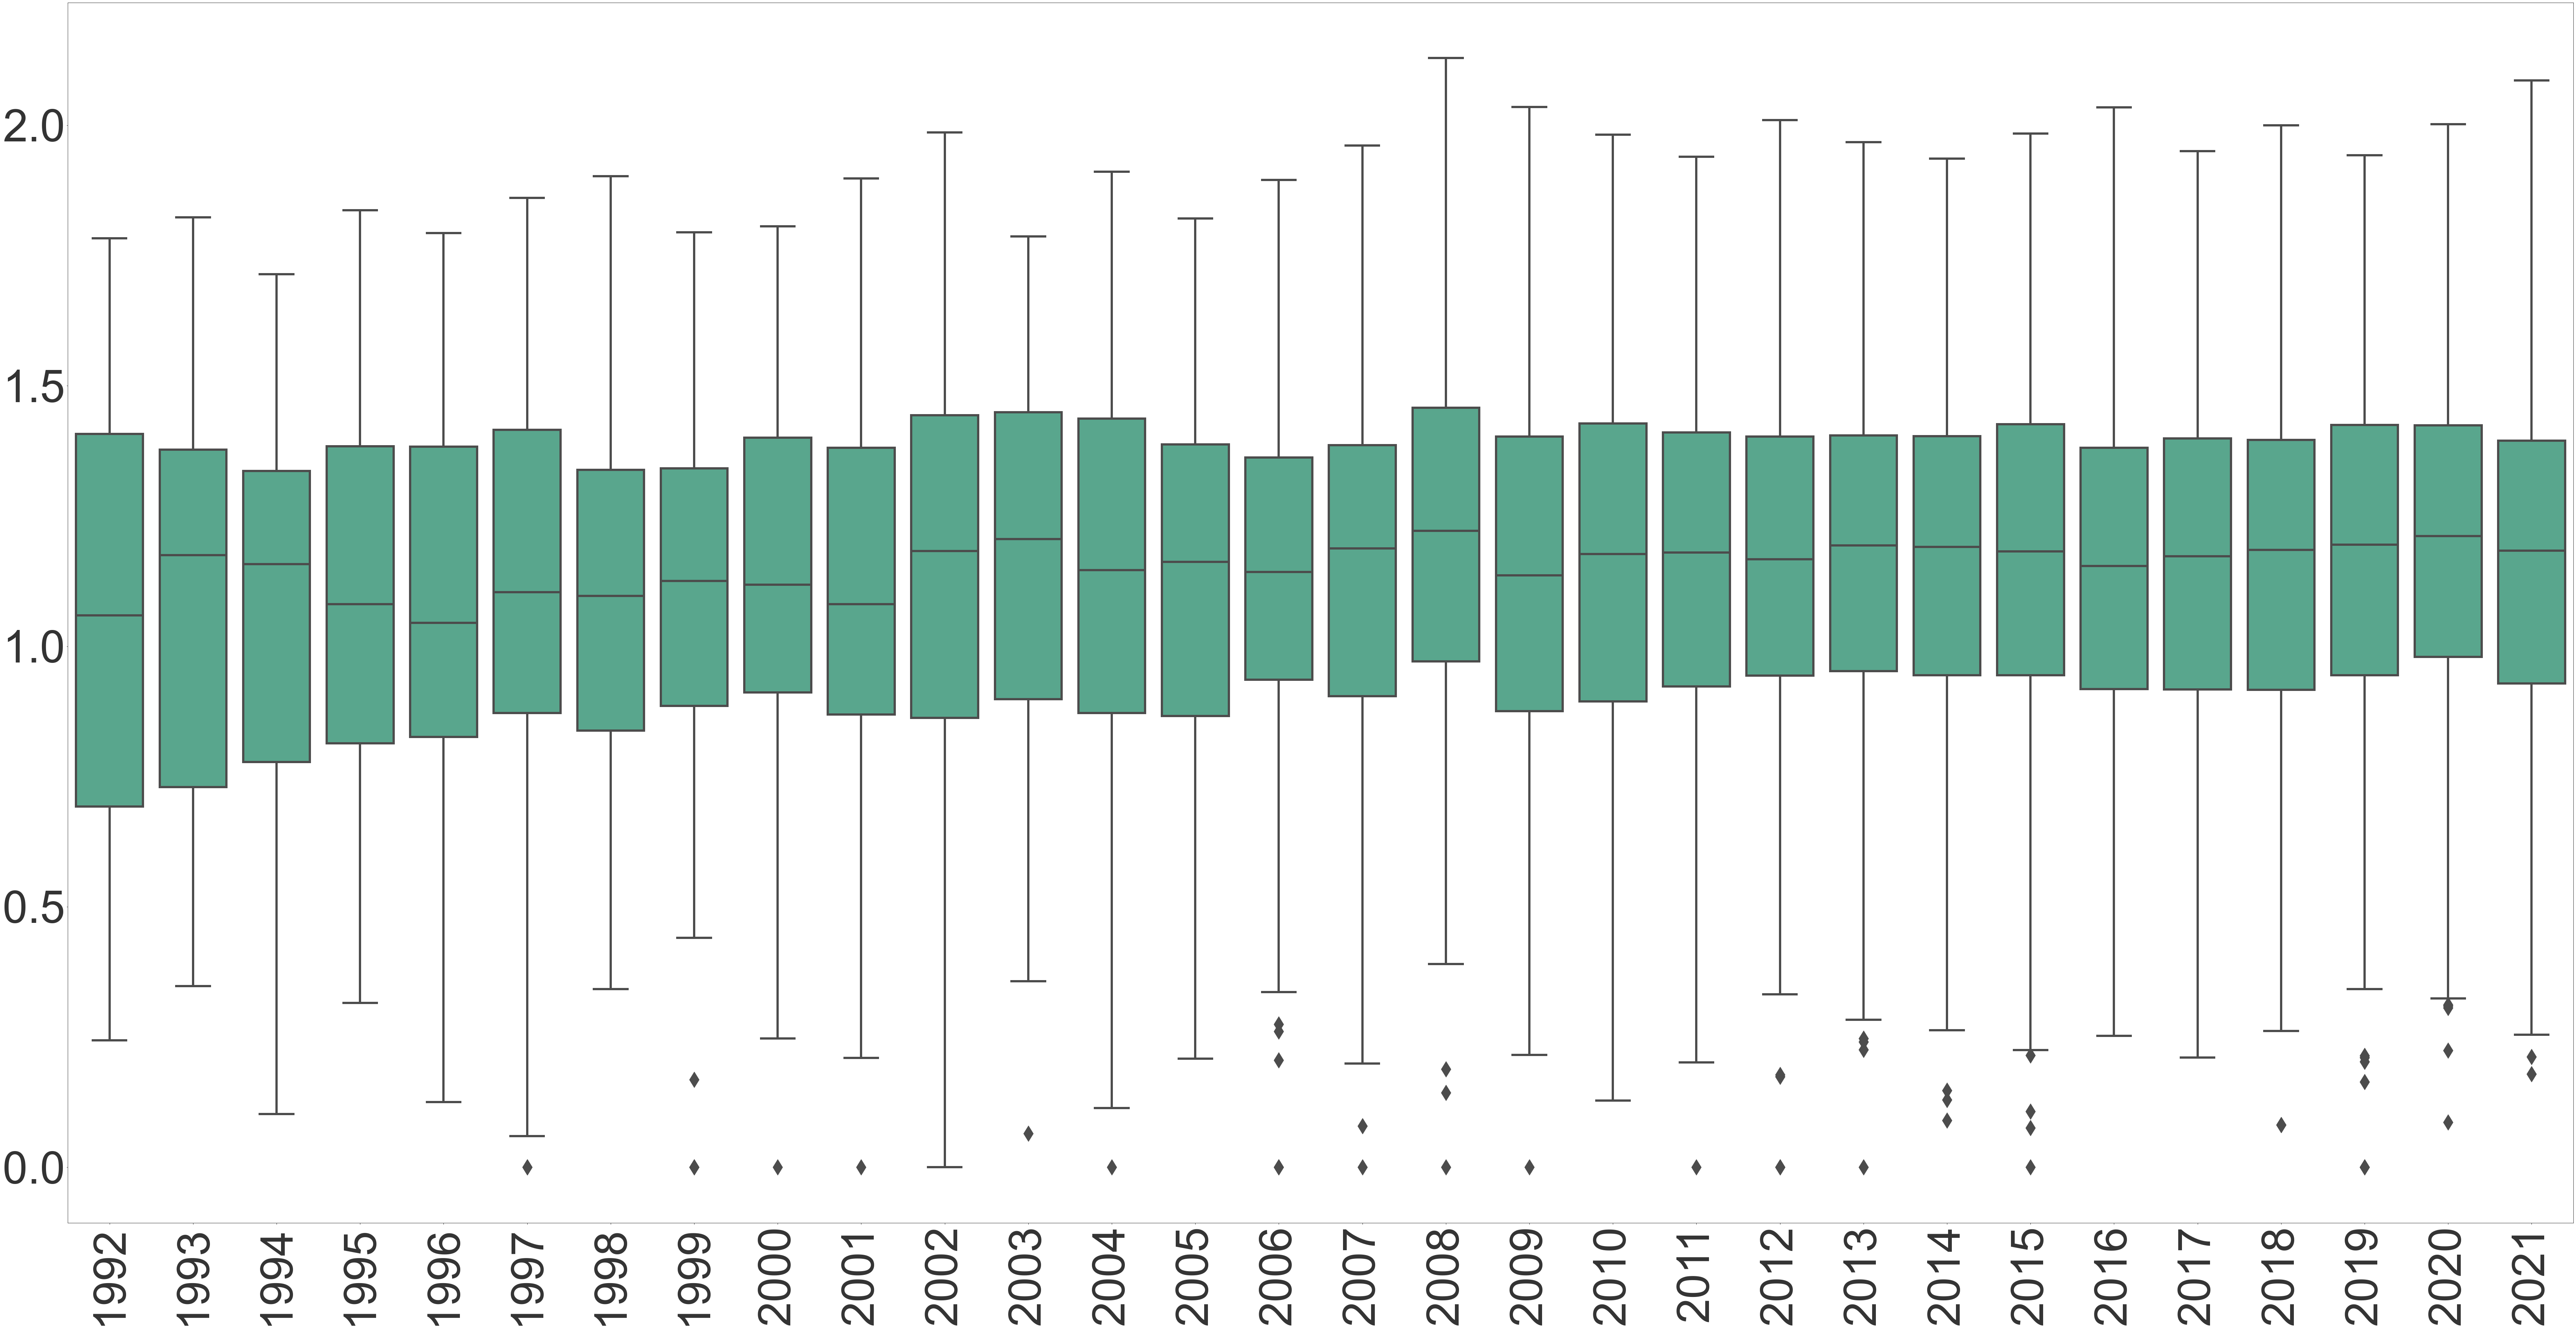

In [57]:
#right one
fig = plt.figure(figsize=(120,60), facecolor='white')
sns.boxplot(data=diversity_1992to2021,color="#4CB391",fliersize=30,linewidth=6)
plt.xticks(np.arange(0, 30, step=1),tick,rotation = 90,alpha=0.8,size=120)
plt.yticks(alpha=0.8,size=120)
#plt.tick_params(axis="y", labelsize=90)
#ax.set_xticklabels(xlabels,alpha=0.6,rotation = 90,size=80)
#ylabels = [ylabel.get_text() for ylabel in ax.get_yticklabels()]
#ax.yaxis.set_ticks(np.arange(start, end, 0.3),labelsize=80)
#ax.set_yticklabels(np.arange(start, end, 0.2),alpha=0.6,size=80)
#plt.tick_params(axis="x", labelsize=80)
#plt.tick_params(axis="x", labelsize=80)
plt.savefig(saving_path+"average_shanon_diversity_per_year_"+ time.strftime("%Y-%m-%d %H%M%S")+".png",dpi=150)

In [38]:
for bar, newwidth in zip(ax.patches, widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - newwidth/2.)
    bar.set_width(newwidth)

AttributeError: module 'matplotlib.pyplot' has no attribute 'patches'

In [78]:
ylabels=np.around(np.arange(start, end, 0.2),2)


In [79]:
ylabels

array([-0.11,  0.09,  0.29,  0.49,  0.69,  0.89,  1.09,  1.29,  1.49,
        1.69,  1.89,  2.09])

In [105]:
start, end = ax.get_ylim()
ax.xaxis.set_ticks(np.arange(start, end, 0.3),dtype='2f')

TypeError: set_ticks() got an unexpected keyword argument 'dtype'

In [65]:

year_diversity_mean = pd.DataFrame.from_dict(year_diversity_avg,orient="index",columns=["avearge"])


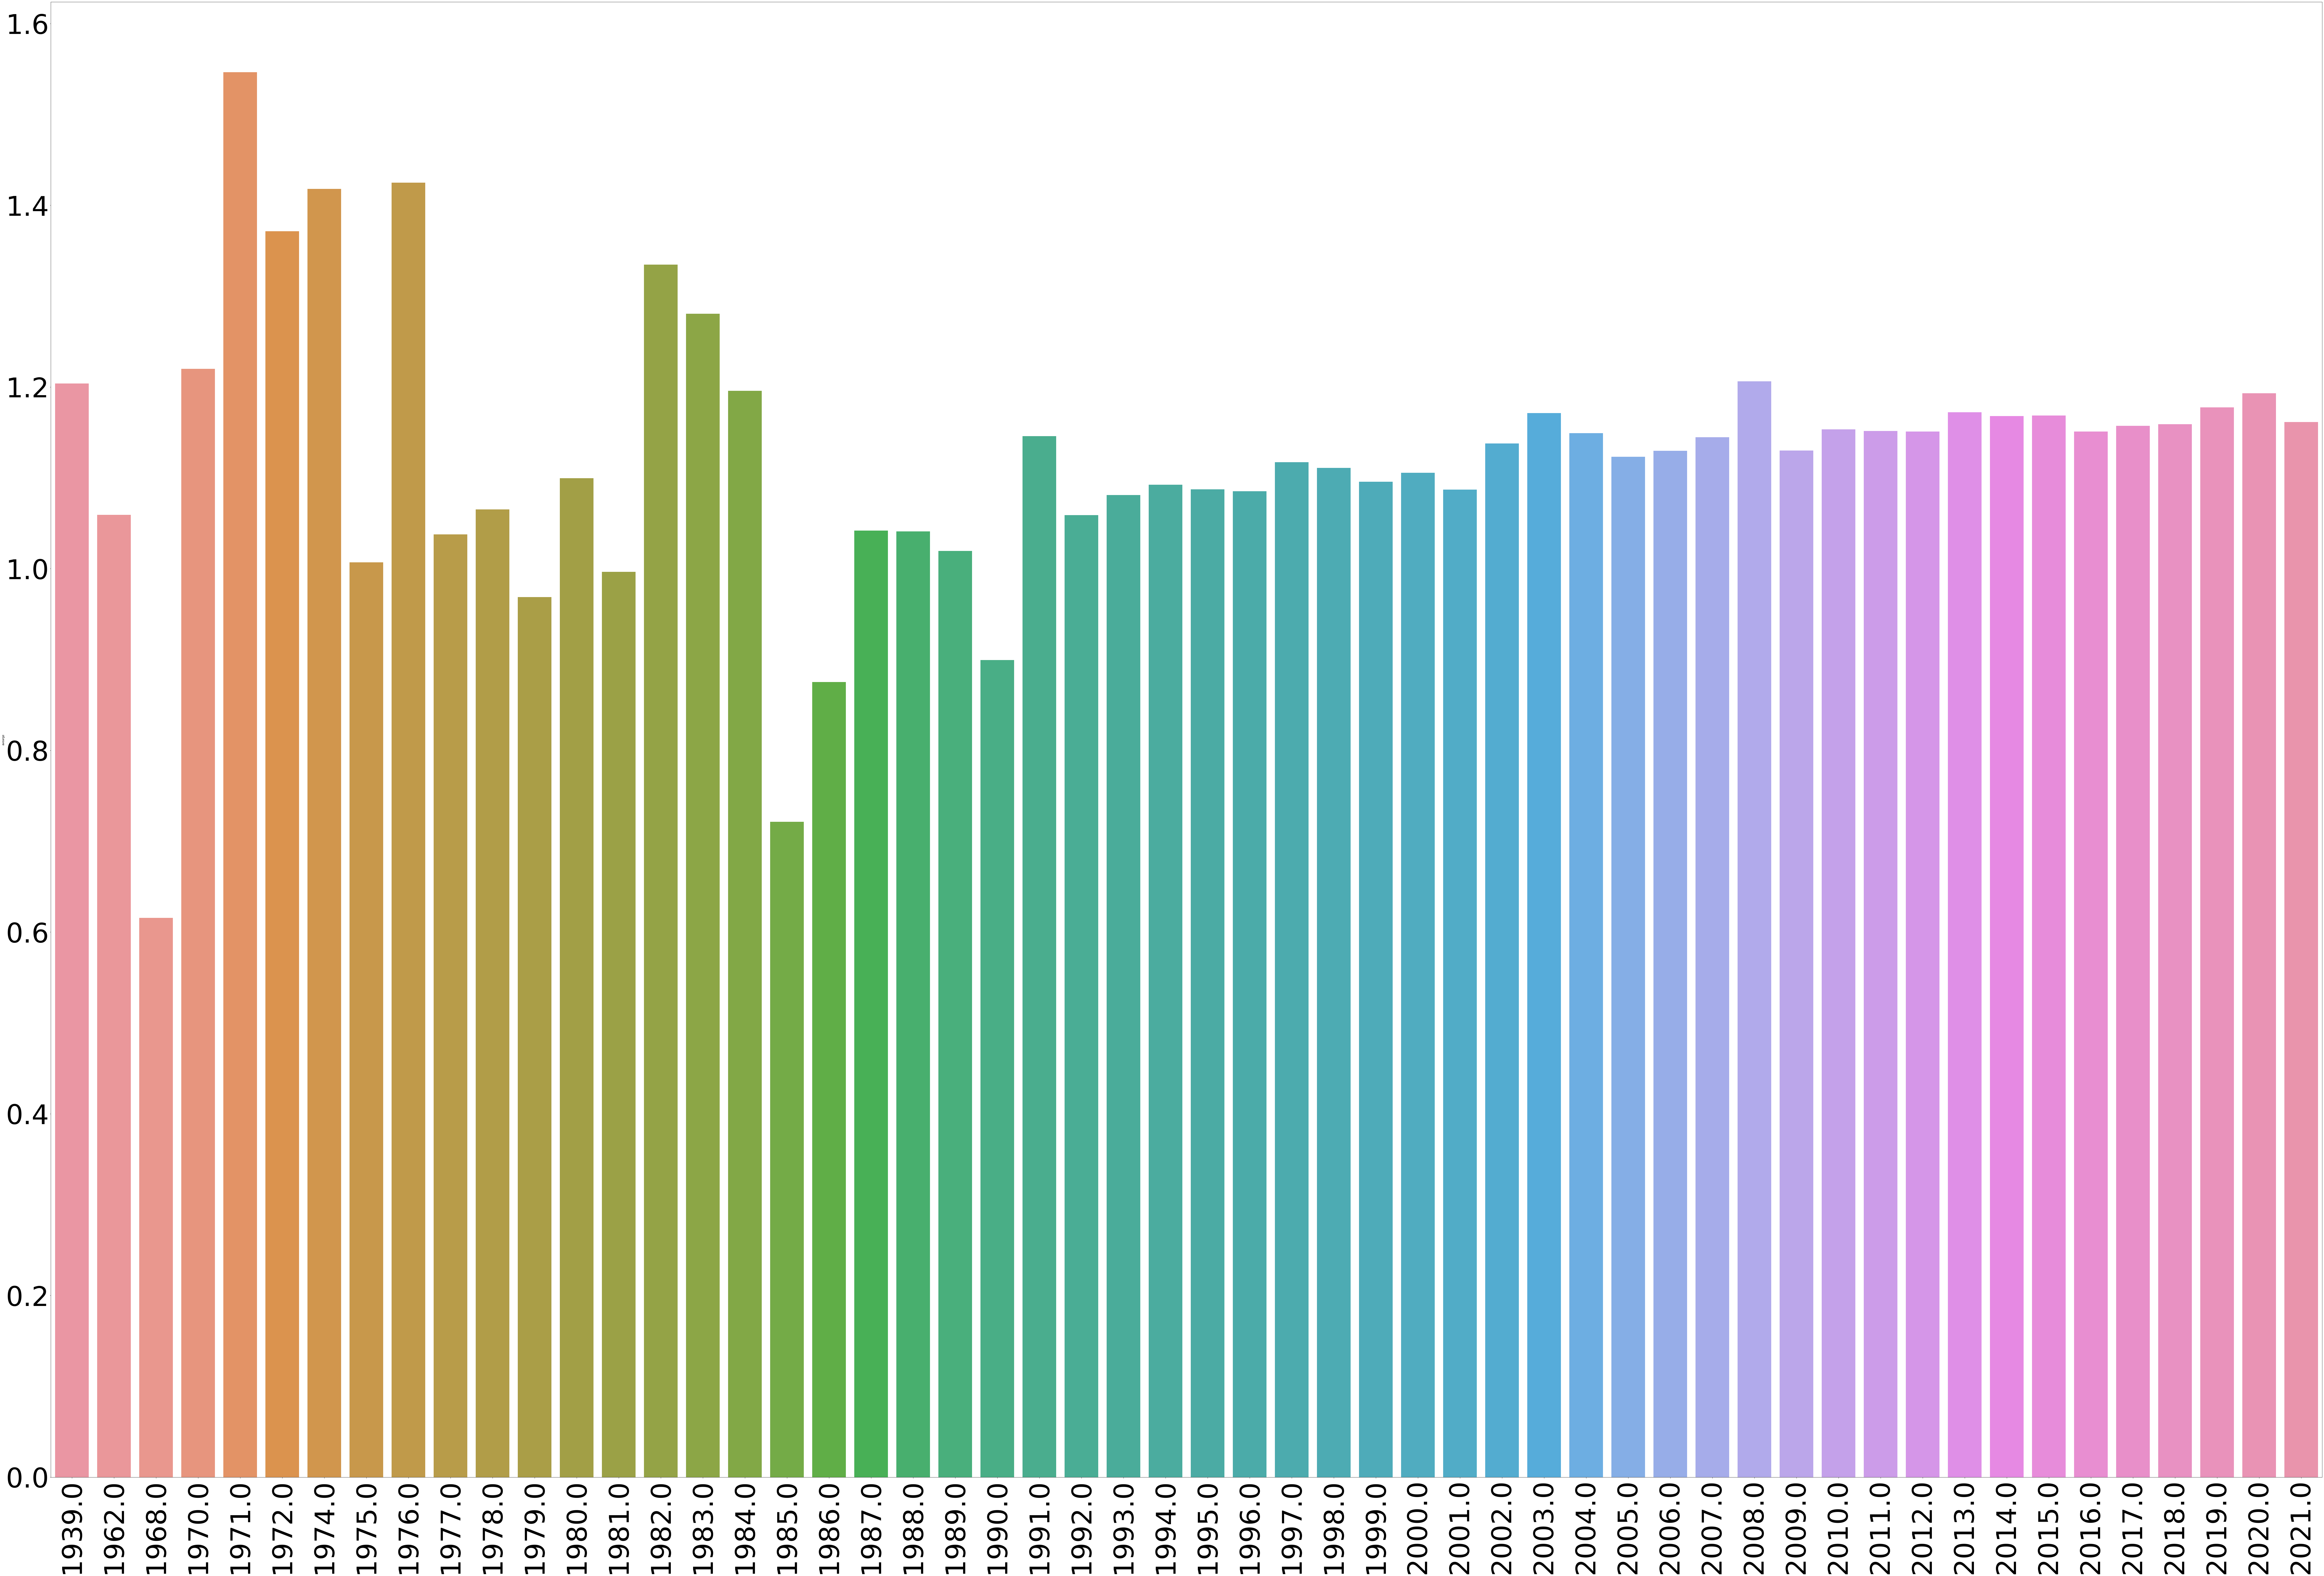

In [81]:
fig = plt.figure(figsize=(150,100), facecolor='white')
sns.barplot(x=year_diversity_mean.index,y="avearge",data=year_diversity_mean,ci=95)
plt.xticks(rotation = 90)
plt.tick_params(axis="y", labelsize=100)
plt.tick_params(axis="x", labelsize=100)

In [46]:
year_diversity["shannon"].keys()

dict_keys([1939.0, 1962.0, 1968.0, 1970.0, 1971.0, 1972.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0])

In [53]:
# Define topic names (25)

if nTopics == 11:
    topic_names = ['Modeling & Forecasting', 'Precipiatation and Extremes', 'Climate Change', 'Urban Risk Management', 
                   'River Hydraulics',"Wetland & Ecology",'Groundwater & Soil Chemistry',"Geomorphology",
                  "Soil hydrology","Coastal hydrology","Reservoir"]

In [54]:
topic_colors = ['steelblue','darkorchid', 'seagreen','slategrey','darkturquoise','tomato','lightcoral',
                  'indigo','burlywood','blueviolet','firebrick']

In [90]:
font = {'family' : "Arial",
         'weight' : 'normal',
         'size'   : 16}
plt.rc('font', **font)

In [60]:
# Calculate r values per metric and plotting them.


r_vals_global = {}


for metric in diversity_metrics_3:
    
    r_vals_global[metric] = {}
    
    for t, topic in enumerate(topic_names):

        r_vals_global[metric][topic] = np.corrcoef(topic_distributions[:,t],global_diversity[metric])[0,1]


fig = plt.figure(figsize=(150,100), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

# for metric in diversity_metrics:
ax = fig.add_subplot(1, 1, plot_number)
ax.bar(topic_names, r_vals_global['shannon'].values(), color = topic_colors)
ax.tick_params(axis="x", labelsize=160)
ax.tick_params(axis="y", labelsize=160)
#ax.set_ylim(-0.3,0.3)
#ax.set_title('R-values for Statistical Relationship Between Per-Article Shannon Diversity & Topic Distributions', size = 150)
# Go to the next plot for the next loop
plot_number = plot_number + 1
plt.xticks(rotation = 90)
ax.grid()
plt.tight_layout()
plt.savefig(saving_path+"R values between shanon diversity and topic ditributions_"+ time.strftime("%Y-%m-%d %H%M%S")+".jpg",dpi=100)

In [17]:
r_vals_global['shannon']

{'Modeling & Forecasting': 0.220922135360443,
 'Precipiatation and Extremes': 0.08283193837601525,
 'Climate Change': 0.1671880370657664,
 'Urban Risk Management': -0.22268214678338774,
 'River Hydraulics': -0.007762315220301371,
 'Wetland & Ecology': -0.31963619909851354,
 'Groundwater & Soil Chemistry': 0.09003075995296814,
 'Geomorphology': 0.13904690070940362,
 'Soil': 0.16953240041348616,
 'Coastal hydrology': 0.08152020438778043,
 'Reservoir': 0.26480033080634674}